# Impact of Cloud optical depth on atmospheric transmission on Radiance
=======================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 January 2020
- update :  November 7th 2023
  
======================================================================


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
from scipy.interpolate import interp1d

In [6]:
import time
from datetime import datetime,date
import dateutil.parser

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:


from libradtranpy import libsimulateThermal

In [9]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret/MacOSX/External/libRadtran'

In [10]:
am=1.
pressure = 0.
pwv=4.0
aer=0
ozone=300.

In [11]:
#cloudext=np.linspace(0.0,0.2,10)
cloudext=np.linspace(0.2,0.3,1)

In [12]:
NBOBS=len(cloudext)

In [13]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

In [14]:
all_temp = []
for index in np.arange(NBOBS):

    path,thefile=libsimulateThermal.ProcessSimulation(am,pwv,ozone,pressure,
                                                      prof_str='us',proc_str='sa',cloudext=cloudext[index],thermal_output='radiance')
    
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1:] 
    all_temp.append(atm)

In [15]:
# this array is defined (hardcoded in radiance definition in libsimulateThermal.py
costh=np.array([1. , 0.9, 0.8,  0.7, 0.6, 0.5 , 0.4,  0.3, 0.2,  0.1 ])

In [16]:
N=len(costh)

In [17]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [18]:
cldindex = str(int(cloudext[0] * 1000))     
cld_str=cldindex.zfill(4)

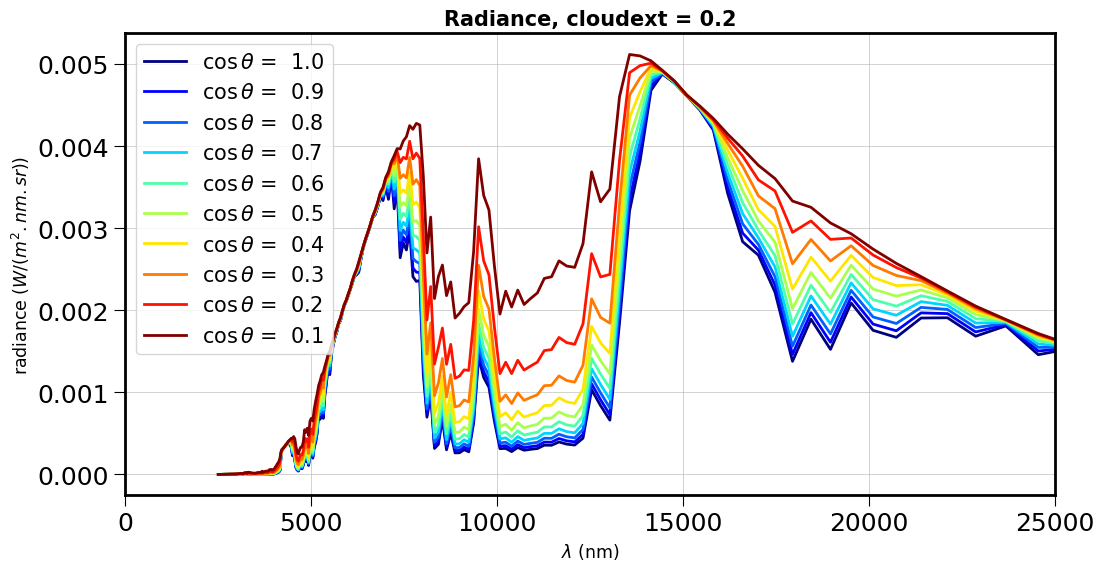

In [19]:
for index in np.arange(N):
    label = "$\cos \\theta $ =  {}".format(costh[index])
    plt.plot(wl,atm[:,index],'-',color=all_colors[index],label=label)
plt.xlim(0,25000)
plt.grid()
title = "Radiance, cloudext = {}".format(cloudext[0])
plt.title(title)
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("radiance ($W/(m^2.nm.sr)$)")
plt.legend()
figname=string_date+"_radiance_cloudext_{}.png".format(cld_str)
plt.savefig(figname)